In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

In [2]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [20]:
# import csv file
sales_df = pd.read_csv('D:\Python Data Analysis\sales\salesdata.csv', encoding= 'unicode_escape')
#encoding= 'unicode_escape' is added to avoid encoding error 

In [21]:
sales_df.shape

(10000, 14)

 The file contains 10000 rows and 13 columns

In [22]:
#Let's check the first few rows
sales_df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,NaN
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,NaN
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/01/2011,6515,154.06,90.93,1003700.90,592408.95,NaN
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/06/2012,7683,668.27,502.54,5134318.41,3861014.82,NaN
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/05/2015,3491,47.45,31.79,165647.95,110978.89,NaN


### Data cleaning

In [23]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      9999 non-null   float64
 10  Unit Cost       9986 non-null   float64
 11  Total Revenue   9986 non-null   float64
 12  Total Cost      9986 non-null   float64
 13  Total Profit    0 non-null      float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


In [24]:
#Let's drop the blank column
sales_df.drop(['Total Profit'],axis=1, inplace=True)
#It deletes the entire column and save the new data in the same df name

In [25]:
# Let's find any null values in the dataset and delete them if exists
sales_df.isnull()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,True,True,True
9996,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
sales_df.isnull().sum()

Region             0
Country            0
Item Type          0
Sales Channel      0
Order Priority     0
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         1
Unit Cost         14
Total Revenue     14
Total Cost        14
dtype: int64

There are few null values in the last four columns. Let's delete those rows. There are also few other options like using mean values from the adjacent top and bottom rows to fulfill those missing values. 

In [27]:
sales_df.shape

(10000, 13)

In [28]:
sales_df.dropna(inplace=True) #will drop the rows with the null values

In [29]:
sales_df.shape

(9986, 13)

In [30]:
sales_df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost
count,9.986000e+03,9986.000000,9986.000000,9986.000000,9.986000e+03,9.986000e+03
mean,5.500442e+08,5003.306529,268.098894,188.757831,1.333683e+06,9.384943e+05
std,2.607963e+08,2873.772574,217.900100,176.398157,1.465732e+06,1.146469e+06
min,1.000892e+08,2.000000,9.330000,6.920000,1.679400e+02,1.245600e+02
25%,3.222416e+08,2529.250000,109.280000,56.670000,2.883791e+05,1.647587e+05
50%,5.488566e+08,4964.500000,205.700000,117.110000,7.996138e+05,4.814296e+05
75%,7.762990e+08,7472.000000,437.200000,364.690000,1.819368e+06,1.183602e+06
max,9.999342e+08,10000.000000,668.270000,524.960000,6.680027e+06,5.241726e+06


Here in the dataframe above , summary of OrderID doesn't make any sense. So let's take it off the summary list

In [31]:
sales_df[['Units Sold','Unit Price','Unit Cost','Total Revenue','Total Cost']].describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost
count,9986.000000,9986.000000,9986.000000,9.986000e+03,9.986000e+03
mean,5003.306529,268.098894,188.757831,1.333683e+06,9.384943e+05
std,2873.772574,217.900100,176.398157,1.465732e+06,1.146469e+06
min,2.000000,9.330000,6.920000,1.679400e+02,1.245600e+02
25%,2529.250000,109.280000,56.670000,2.883791e+05,1.647587e+05
50%,4964.500000,205.700000,117.110000,7.996138e+05,4.814296e+05
75%,7472.000000,437.200000,364.690000,1.819368e+06,1.183602e+06
max,10000.000000,668.270000,524.960000,6.680027e+06,5.241726e+06


### Data Analysis

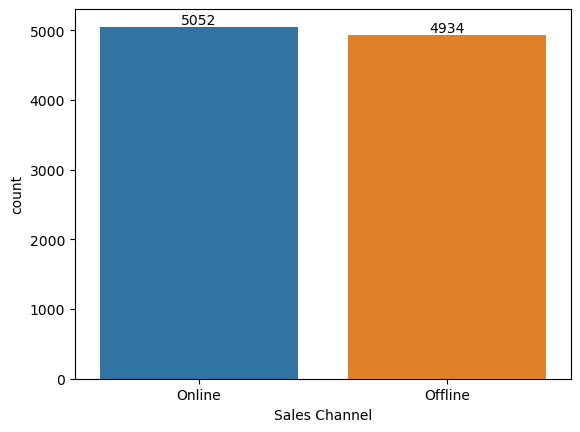

In [35]:
# count of online and offline sales
channelcount=sns.countplot(x='Sales Channel',data=sales_df)
for bars in channelcount.containers:
    channelcount.bar_label(bars)

The company is almost equally active in online and offline sales.

### Top Regions based on sales destination

In [36]:
sales_df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost'],
      dtype='object')

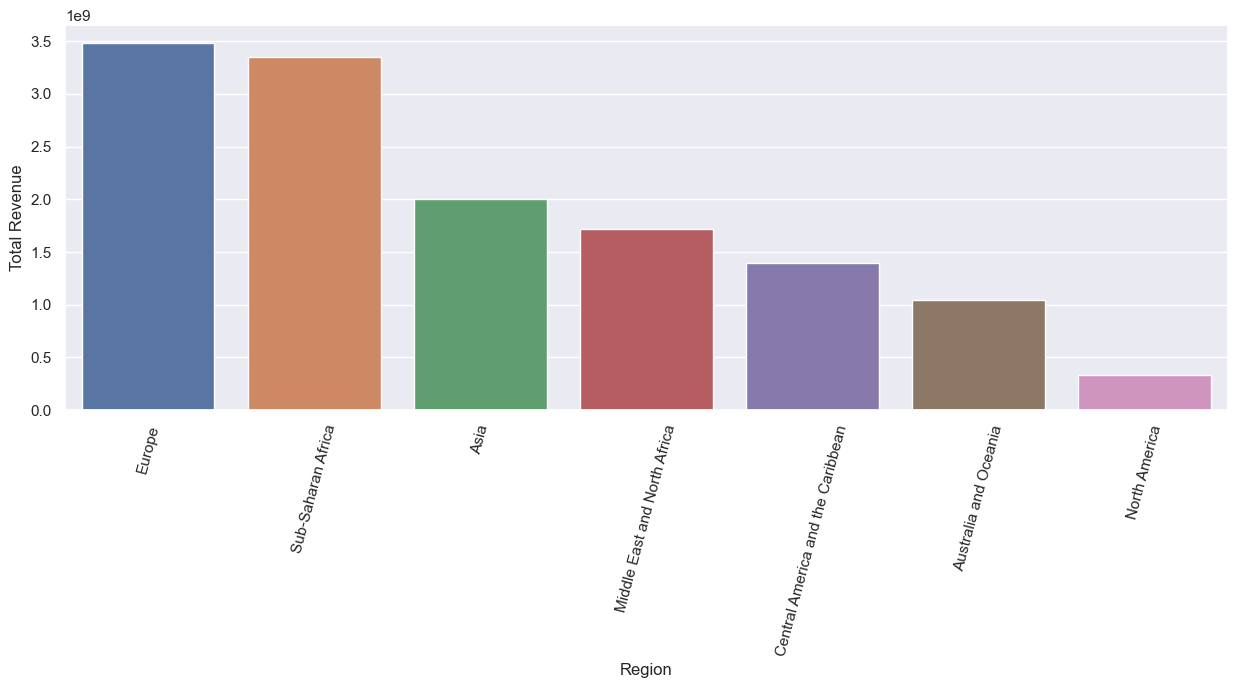

In [50]:
sales_dest=sales_df.groupby(['Region'],as_index=False)['Total Revenue'].sum().sort_values(by='Total Revenue',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Region',y='Total Revenue',data=sales_dest)
plt.xticks(rotation=75)
plt.show()


The graph shows that Europe is the region producing highest revenue followed by Sub-Saharan Africa and Asia

### Top 10 countries as a sales destination

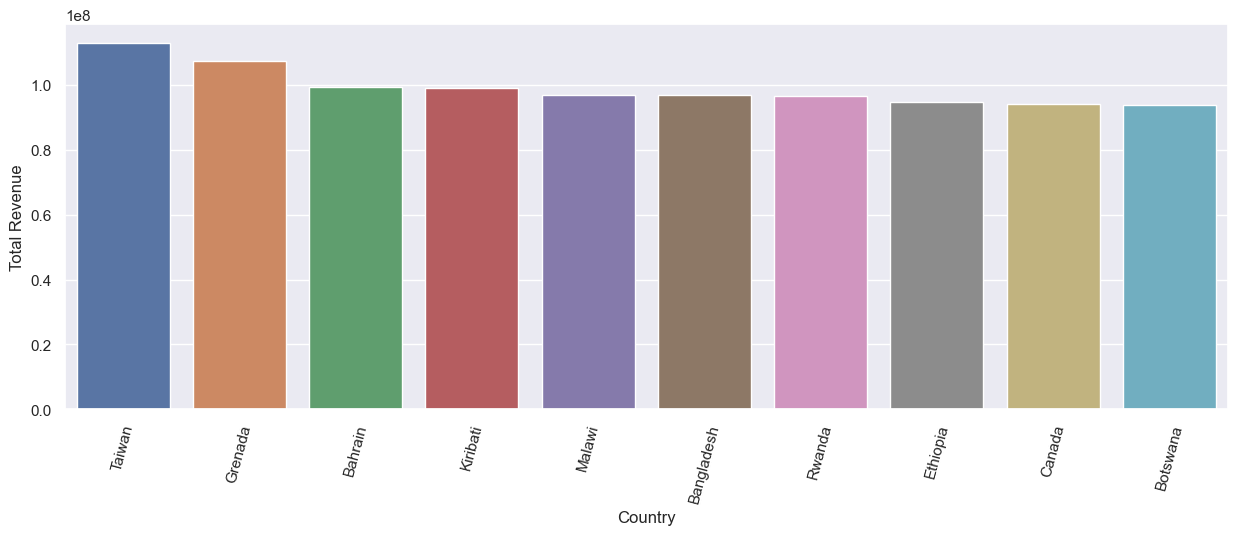

In [53]:
sales_dest_c=sales_df.groupby(['Country'],as_index=False)['Total Revenue'].sum().sort_values(by='Total Revenue',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Country',y='Total Revenue',data=sales_dest_c)
plt.xticks(rotation=75)
plt.show()

Tiwan is the country from where the highest revenue is collected followd by Grenada and Bahrain

### Top 10 selling products

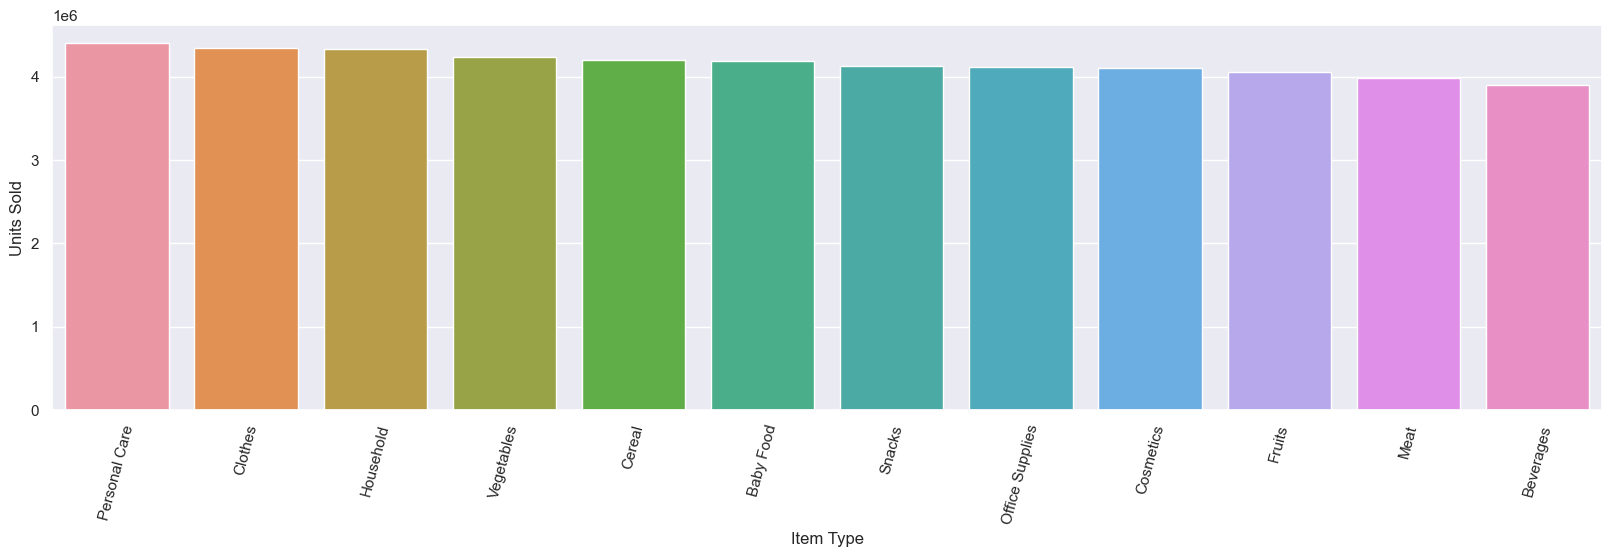

In [60]:
item_sell=sales_df.groupby(['Item Type'],as_index=False)['Units Sold'].sum().sort_values(by='Units Sold',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Item Type',y='Units Sold',data=item_sell)
plt.xticks(rotation=75)
plt.show()

The graph above shows that the Personal care items are the most selling items followed by clothes and household items

### Regionwise sales channel

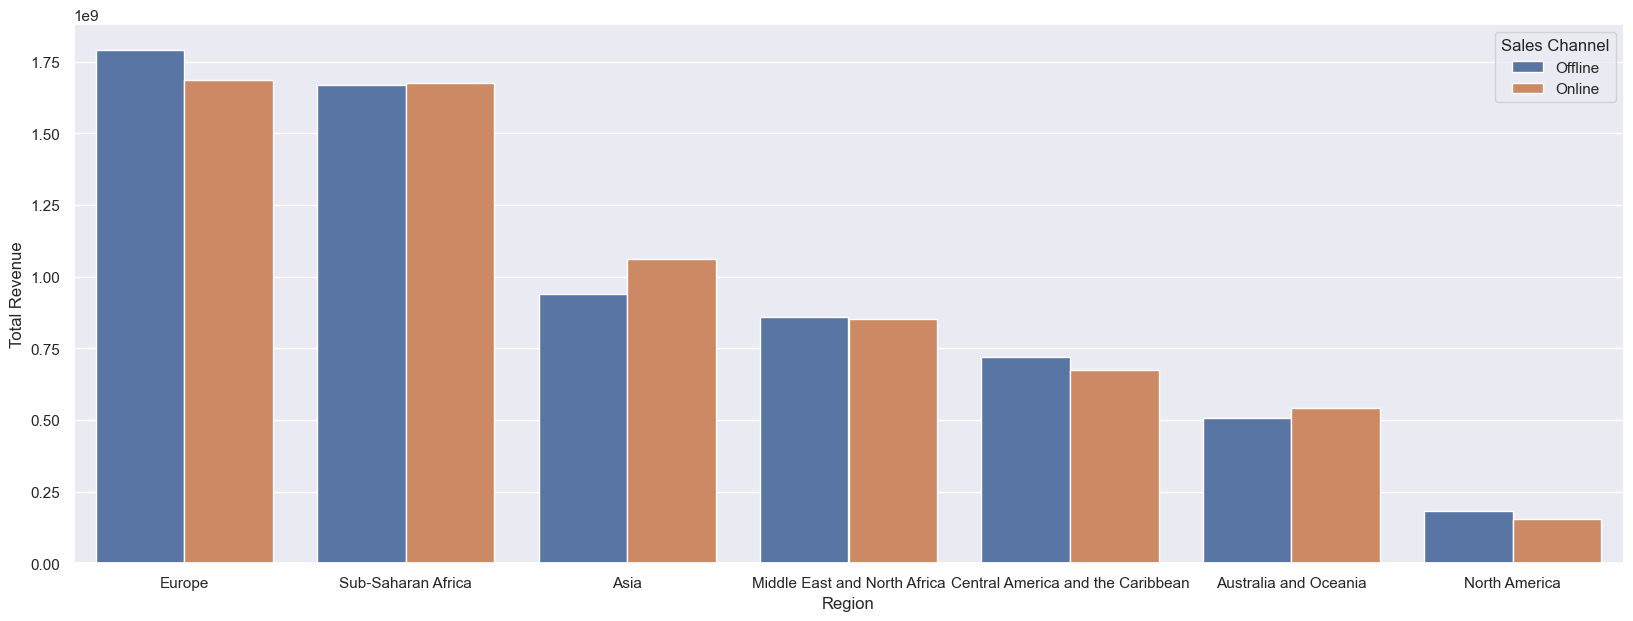

In [61]:
reg_cnt=sales_df.groupby(['Region','Sales Channel'],as_index=False)['Total Revenue'].sum().sort_values(by='Total Revenue',ascending=False)
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(x='Region',y='Total Revenue',hue='Sales Channel',data=reg_cnt)
plt.show()

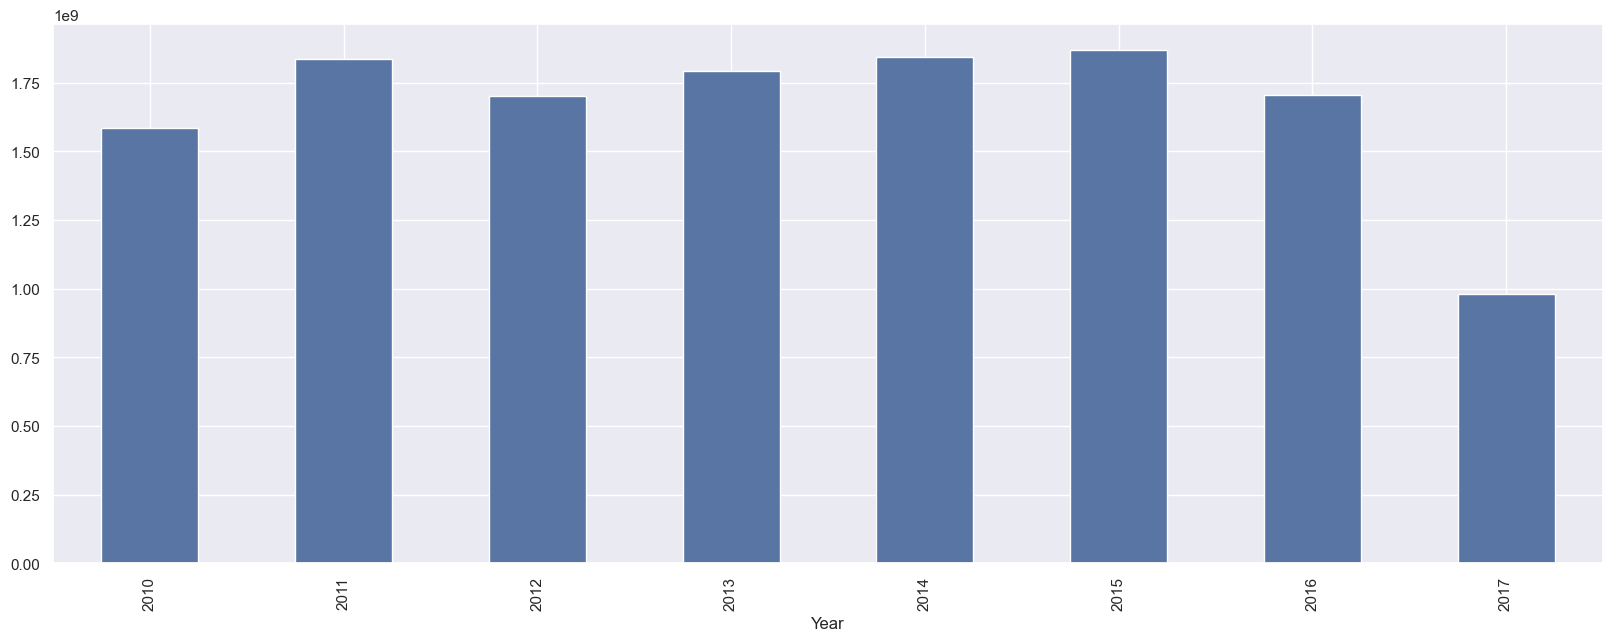

In [81]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df['Year'] = sales_df['Order Date'].dt.year
yearly_revenue = sales_df.groupby('Year')['Total Revenue'].sum()
yearly_revenue.plot(kind='bar', color='#5975A4')
plt.show()


Above diagram shows that the company's revenue is declining after 2015.There is a significant decrease in sales in 2017. 
why there is a significant decline in 2017? Let's find it.

In [83]:
sales_df['Year'] = sales_df['Order Date'].dt.year
sales_df['Month'] = sales_df['Order Date'].dt.month

In [95]:
sales_df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Year,Month
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,2011,1
1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,2015,12
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,2011-01-13,141515767,2/01/2011,6515,154.06,90.93,1003700.90,592408.95,2011,1
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,2012-09-11,500364005,10/06/2012,7683,668.27,502.54,5134318.41,3861014.82,2012,9
4,Europe,Czech Republic,Beverages,Online,C,2015-10-27,127481591,12/05/2015,3491,47.45,31.79,165647.95,110978.89,2015,10
5,Sub-Saharan Africa,South Africa,Beverages,Offline,H,2012-07-10,482292354,8/21/2012,9880,47.45,31.79,468806.00,314085.20,2012,7
6,Asia,Laos,Vegetables,Online,L,2011-02-20,844532620,3/20/2011,4825,154.06,90.93,743339.50,438737.25,2011,2
8,Sub-Saharan Africa,Eritrea,Meat,Online,L,2014-11-21,411809480,1/10/2015,2431,421.89,364.69,1025614.59,886561.39,2014,11
9,Central America and the Caribbean,Haiti,Office Supplies,Online,C,2015-07-04,327881228,7/20/2015,6197,651.21,524.96,4035548.37,3253177.12,2015,7
10,Sub-Saharan Africa,Zambia,Cereal,Offline,M,2016-07-26,773452794,8/24/2016,724,205.70,117.11,148926.80,84787.64,2016,7


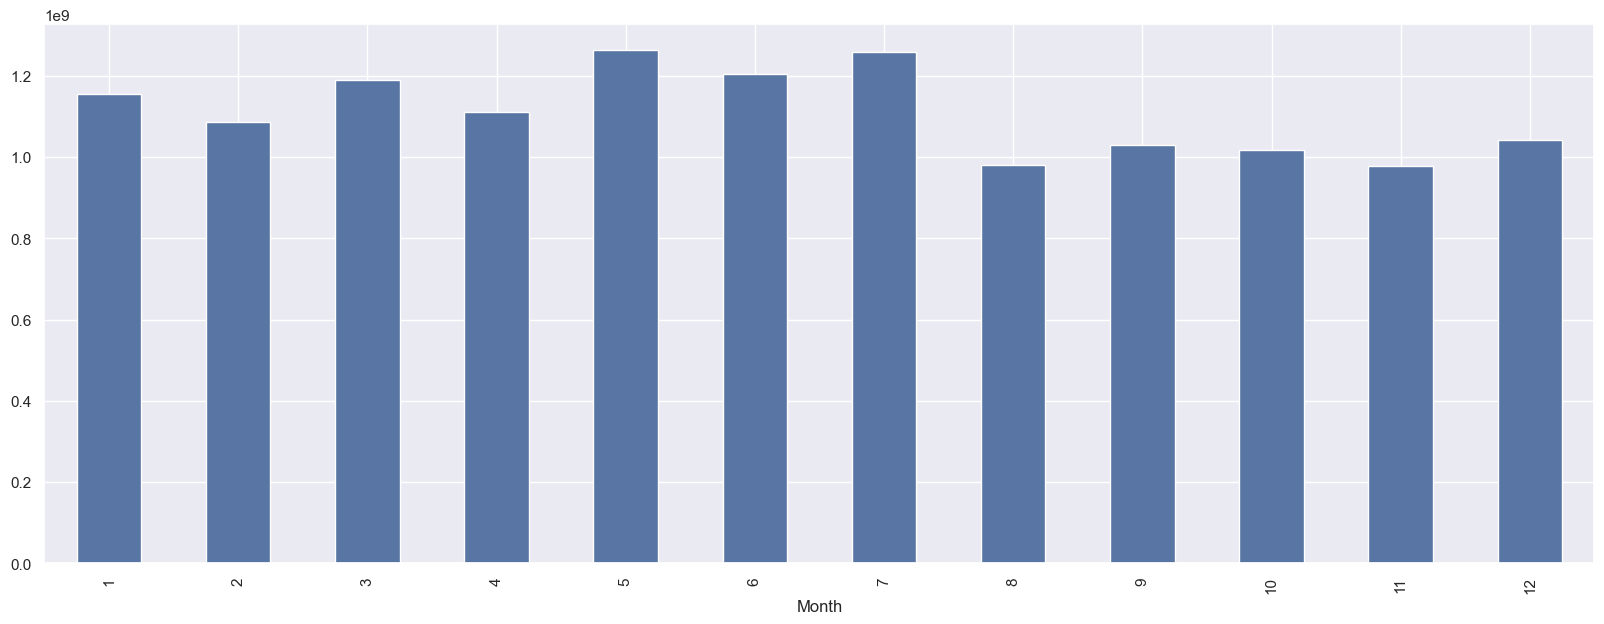

In [86]:

monthly_revenue = sales_df.groupby('Month')['Total Revenue'].sum()
monthly_revenue.plot(kind='bar', color='#5975A4')
plt.show()

After July, there is a significant decline. We need to check whether the data is complete for the year 2017 or not

### Let's find out the monthly sale for 2017

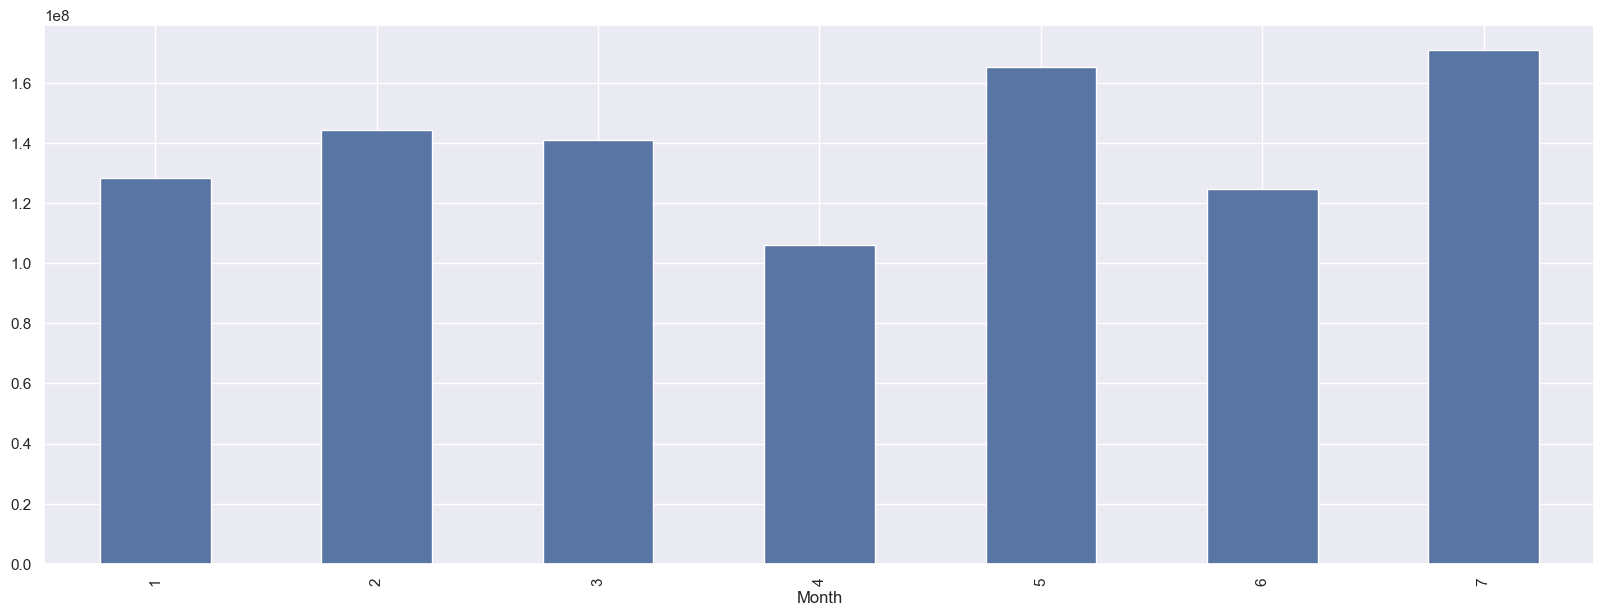

In [90]:
year_data = sales_df[sales_df['Year'] == 2017]
monthly_rev = year_data.groupby('Month')['Total Revenue'].sum()
monthly_rev.plot(kind='bar', color='#5975A4')
plt.show()

Looks like 2017 sales data is not complete. The transactions are only recorded till July